# Walk Forward: A Realistic Approach to Backtesting

![](<src/10_Table_Validation Methods.png>)

## Load the data

In [1]:
import pandas as pd
df = pd.read_csv('../../../data/UCIrvine/LD2011_2014.txt', sep=';', decimal=',', index_col=0, parse_dates=True)

df

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 00:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 23:45:00,1.269036,21.337127,1.737619,166.666667,85.365854,285.714286,10.17524,225.589226,64.685315,72.043011,...,246.252677,28000.0,1443.037975,909.090909,26.075619,4.095963,664.618086,146.911519,646.627566,6540.540541
2015-01-01 00:00:00,2.538071,19.914651,1.737619,178.861789,84.146341,279.761905,10.17524,249.158249,62.937063,69.892473,...,188.436831,27800.0,1409.282700,954.545455,27.379400,4.095963,628.621598,131.886477,673.020528,7135.135135


In [2]:
r = df.sum(axis=1)

In [3]:
r = r.tz_localize(
    "Europe/Lisbon",
    ambiguous=True,  # for October (fall back)
    nonexistent="shift_forward"
)

In [4]:
r = r.tz_convert("UTC")

In [5]:
r = r.resample('h').sum()

<Axes: >

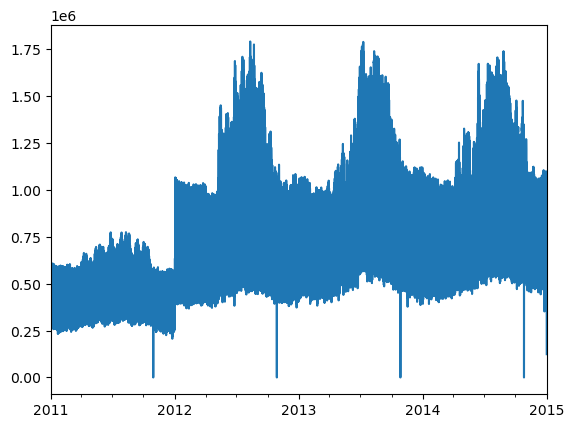

In [6]:
r.plot()

In [7]:
import numpy as np

r[r == 0] = np.nan

In [8]:
r = r.interpolate(method="time", limit=4 * 1)  # limit to 1 hour if 15-min data

In [9]:
r = r.loc['2012':'2014']

In [11]:
r.to_frame(name="energy_kw").to_parquet(
    "../../../data/UCIrvine/ElectricityLoadDiagrams20112014.parquet"
)

<Axes: >

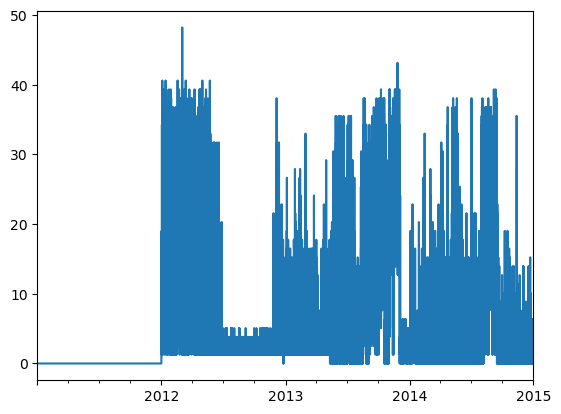

In [5]:
df['MT_001'].plot()

## Walk Forward Validation

### How `TimeSeriesSplit` works

In [2]:
from sklearn.model_selection import TimeSeriesSplit

In [3]:
ts = TimeSeriesSplit(test_size=200)

In [4]:
splits = ts.split(X=df)

In [5]:
split1= next(splits)

In [6]:
split1

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [7]:
split2= next(splits)

In [8]:
split2

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [9]:
list_df_train = []
list_df_test = []

for index_train, index_test in ts.split(df):
    list_df_train.append(df.iloc[index_train])
    list_df_test.append(df.iloc[index_test])

In [10]:
list_df_train[0]

,Open,High,Low,Close,Volume,change_tomorrow
Date,,,,,,
2016-12-08,56.325228,56.582507,55.902560,56.058762,21220800,1.549143
2016-12-09,56.214968,56.959234,56.169027,56.940857,27349400,0.321692
...,...,...,...,...,...,...
2019-03-25,111.863188,113.254764,111.632861,112.918869,27067100,0.212035
2019-03-26,113.840195,113.926565,112.141514,113.158806,26097700,-0.976298


In [11]:
list_df_test[0]

,Open,High,Low,Close,Volume,change_tomorrow
Date,,,,,,
2019-03-27,113.129993,113.446697,110.865089,112.064720,22733400,0.136831
2019-03-28,112.707721,112.842079,111.450503,112.218269,18334800,0.856386
...,...,...,...,...,...,...
2020-01-08,154.122900,155.936349,153.172546,155.247818,27746500,1.233897
2020-01-09,156.944909,157.313420,156.159411,157.187347,21385000,-0.464873


In [12]:
list_df_train[1]

,Open,High,Low,Close,Volume,change_tomorrow
Date,,,,,,
2016-12-08,56.325228,56.582507,55.902560,56.058762,21220800,1.549143
2016-12-09,56.214968,56.959234,56.169027,56.940857,27349400,0.321692
...,...,...,...,...,...,...
2020-01-08,154.122900,155.936349,153.172546,155.247818,27746500,1.233897
2020-01-09,156.944909,157.313420,156.159411,157.187347,21385000,-0.464873


In [13]:
list_df_test[1]

,Open,High,Low,Close,Volume,change_tomorrow
Date,,,,,,
2020-01-10,157.895252,158.283148,156.304843,156.460007,20725900,1.188150
2020-01-13,156.867310,158.370431,156.382433,158.341339,21626500,-0.709280
...,...,...,...,...,...,...
2020-10-22,209.109629,211.191639,206.929880,210.048004,22351500,0.619714
2020-10-23,210.184860,211.406695,208.357001,211.357819,18879600,-2.927458


## Machine Learning Model

### Separate the data

1. Target: which variable do you want to predict?
2. Explanatory: which variables will you use to calculate the prediction?

In [14]:
y = df.change_tomorrow
X = df[['Open','High','Low','Close','Volume']]

In [15]:
list_df_train = []
list_df_test = []

for index_train, index_test in ts.split(df):
    X_train, y_train = X.iloc[index_train], y.iloc[index_train]
    X_test, y_test = X.iloc[index_test], y.iloc[index_test]


### Simulate one computation of the ML model

- Compute the model
- Calculate predictions on the test set
- Evaluate how good the model is

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

model_dt = DecisionTreeRegressor(max_depth=15, random_state=42)
model_dt.fit(X_train, y_train)

y_pred = model_dt.predict(X_test)
error_mse = mean_squared_error(y_test, y_pred)
error_mse

5.308276780150754

### Add the procedure inside the for loop

In [17]:
model_dt = DecisionTreeRegressor(max_depth=15, random_state=42)

error_mse_list = []

for index_train, index_test in ts.split(df):
    X_train, y_train = X.iloc[index_train], y.iloc[index_train]
    X_test, y_test = X.iloc[index_test], y.iloc[index_test]
    
    model_dt.fit(X_train, y_train)
    
    y_pred = model_dt.predict(X_test)
    error_mse = mean_squared_error(y_test, y_pred)
    
    error_mse_list.append(error_mse)

In [18]:
error_mse_list

[9.37728476681153,
 11.360255478508225,
 33.52405207745693,
 7.342669459500167,
 5.308276780150754]

In [19]:
import  numpy as np

In [20]:
np.mean(error_mse_list)

13.38250771248552

## Anchored Walk Forward evaluation in backtesting

![](<src/10_Table_Validation Methods.png>)

### Create a new strategy

In [21]:
from backtesting import Backtest, Strategy

In [22]:
df

,Open,High,Low,Close,Volume,change_tomorrow
Date,,,,,,
2016-12-08,56.325228,56.582507,55.902560,56.058762,21220800,1.549143
2016-12-09,56.214968,56.959234,56.169027,56.940857,27349400,0.321692
...,...,...,...,...,...,...
2023-03-14,256.750000,261.070007,255.860001,260.790009,33620300,1.751806
2023-03-15,259.980011,266.480011,259.209991,265.440002,46028000,3.895731


In [ ]:
bt = Backtest(df, ???, cash=10000, commission=.002, exclusive_orders=True)

In [26]:
class Regression(Strategy):
    limit_buy = 1
    limit_sell = -5
    
    n_train = 600
    coef_retrain = 200
    
    def init(self):
        self.model = DecisionTreeRegressor(max_depth=15, random_state=42)
        self.already_bought = False
        
        X_train = self.data.df.iloc[:self.n_train, :-1]
        y_train = self.data.df.iloc[:self.n_train, -1]
        
        self.model.fit(X=X_train, y=y_train)

    def next(self):
        explanatory_today = self.data.df.iloc[[-1], :-1]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]
        
        if forecast_tomorrow > self.limit_buy and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow < self.limit_sell and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

In [27]:
class WalkForwardAnchored(Regression):
    def next(self):
        
        # we don't take any action and move on to the following day
        if len(self.data) < self.n_train:
            return
        
        # we retrain the model each 200 days
        if len(self.data) % self.coef_retrain == 0:
            X_train = self.data.df.iloc[:, :-1]
            y_train = self.data.df.iloc[:, -1]

            self.model.fit(X_train, y_train)

            super().next()
            
        else:
            
            super().next()

In [28]:
from backtesting import Backtest
bt = Backtest(df, WalkForwardAnchored, cash=10000, commission=.002, exclusive_orders=True)

In [29]:
import multiprocessing as mp
mp.set_start_method('fork')

In [31]:
stats_skopt, heatmap, optimize_result = bt.optimize(
    limit_buy = range(0, 6), limit_sell = range(-6, 0),
    maximize='Return [%]',
    max_tries=500,
    random_state=42,
    return_heatmap=True,
    return_optimization=True,
    method='skopt'
    )

dff = heatmap.reset_index()
dff = dff.sort_values('Return [%]', ascending=False)
dff

,limit_buy,limit_sell,Return [%]
20,4,-1,36.666346
19,4,-2,36.666346
...,...,...,...
12,2,-1,-60.946987
11,2,-3,-61.384028


## Unanchored Walk Forward

### Create a library of strategies

### Create the unanchored walk forward class

![](<src/10_Table_Validation Methods.png>)

### Import the strategy and perform the backtest

In [34]:
%load_ext autoreload
%autoreload 2

In [36]:
import strategies

In [37]:
strategies.WalkForwardUnanchored

strategies.WalkForwardUnanchored

In [38]:
bt_unanchored = Backtest(df, strategies.WalkForwardUnanchored, cash=10000, commission=.002, exclusive_orders=True)

stats_skopt, heatmap, optimize_result = bt_unanchored.optimize(
    limit_buy = range(0, 6), limit_sell = range(-6, 0),
    maximize='Return [%]',
    max_tries=500,
    random_state=42,
    return_heatmap=True,
    return_optimization=True,
    method='skopt'
    )

dff = heatmap.reset_index()
dff = dff.sort_values('Return [%]', ascending=False)
dff

,limit_buy,limit_sell,Return [%]
7,2,-6,46.134435
0,0,-6,37.798327
...,...,...,...
13,3,-5,-86.571062
14,3,-4,-86.836675


### Interpret the strategies' performance

In [39]:
bt.plot(filename='reports_backtesting/walk_forward_anchored.html')

Row(id='3445', ...)

In [40]:
bt_unanchored.plot(filename='reports_backtesting/walk_forward_unanchored.html')

Row(id='4465', ...)

## Practice to master the knowledge

Work on the challenge with another dataset:

1. Learn the <a>mental models</a> to solve the challenge faster.
2. Complete the <a href="10D_Walk Forward Regression.ipynb">notebook</a>.